In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

In [3]:
# Load the data
data = pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_clean.csv")
data.head(1)

,Gender,Age,Hyper_Tension,Heart_Disease,Smoking_History,BMI,Blood_Glucose_Level,HbA1c_levels,Diabetes
0,1,1,0,0,0,-0.686567,0,2,0


In [4]:
# Feature and target variables
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

In [5]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=52)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=52)

Accuracy: 0.9
Precision: 0.6
Recall: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        88
           1       0.60      0.50      0.55        12

    accuracy                           0.90       100
   macro avg       0.77      0.73      0.74       100
weighted avg       0.89      0.90      0.90       100



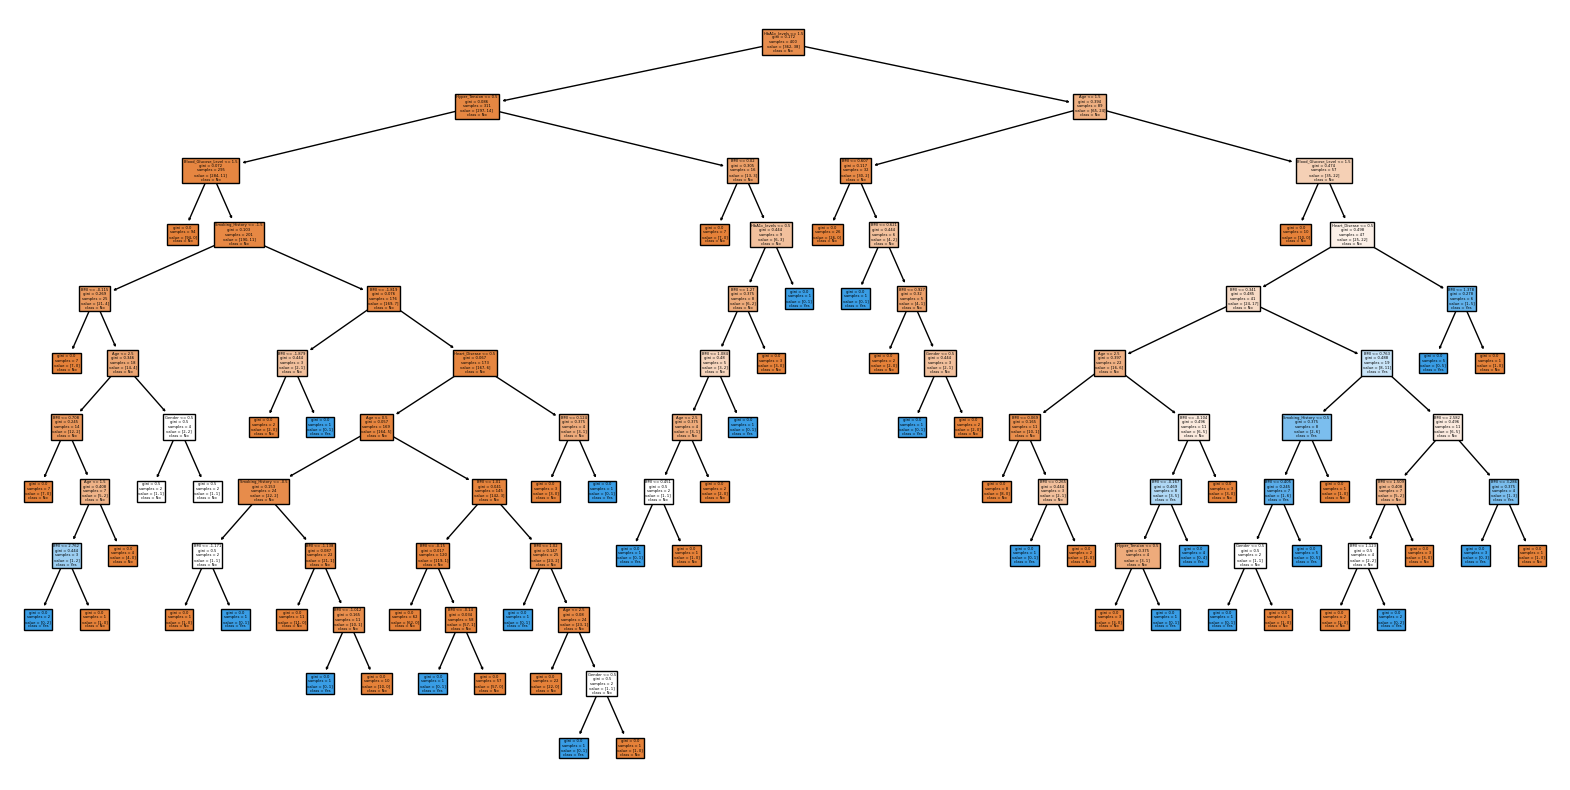

In [16]:
# Predictions
y_pred = dtree.predict(X_test)



# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization of the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.show()

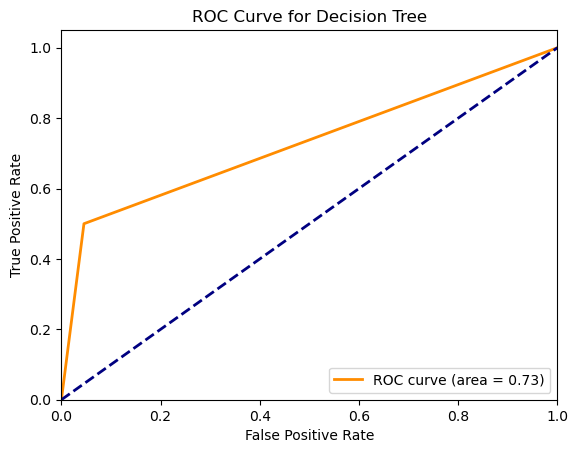

In [7]:
# Predict probabilities
y_proba = dtree.predict_proba(X_test)[:, 1]

# Calculate false positive, true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_proba)  

# Calculate AUC
roc_auc = auc(fpr, tpr)  

# Plot ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

[[450   0]
 [  2  48]]


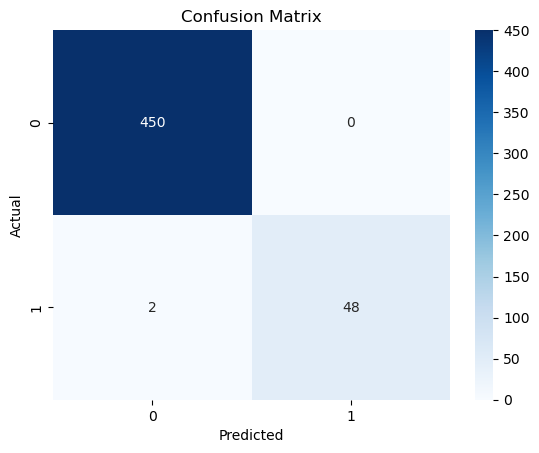

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np



# Train model
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Make predictions
y_pred = clf.predict(X)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Print confusion matrix
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Confusion Matrix')
plt.show()

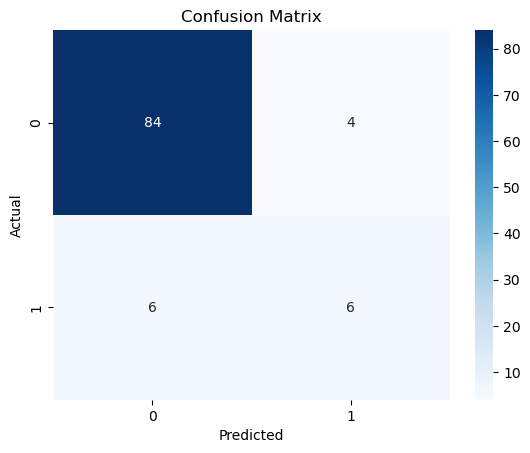

In [20]:
import seaborn as sns
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

[[88  0]
 [ 0 12]]


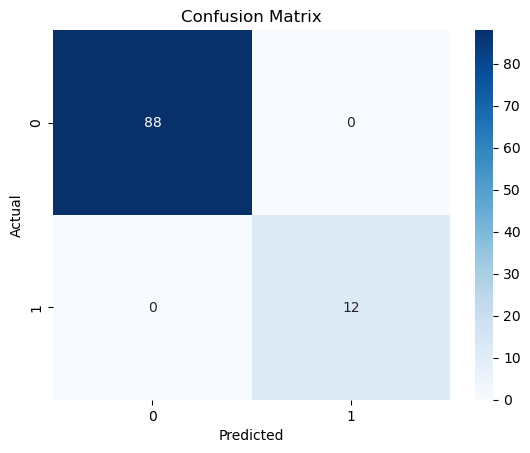

In [23]:
# Predict on test data 
y_pred = clf.predict(X_test)

# Calculate confusion matrix on test labels and preds
cm = confusion_matrix(y_test, y_pred)

# Print the matrix
print(cm) 

# Visualize 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Confusion Matrix')
plt.show()